In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshatgupta7/crop-yield-in-indian-states-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-yield-in-indian-states-dataset


In [33]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [4]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0],True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [29]:
df = pd.read_csv('/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv') # Path to the dataset directory


In [31]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
           Crop  Crop_Year       Season  State  ...  Annual_Rainfall  Fertilizer  Pesticide        Yield
0      Arecanut       1997  Whole Year   Assam  ...           2051.4  7024878.38   22882.34     0.796087
1     Arhar/Tur       1997  Kharif       Assam  ...           2051.4   631643.29    2057.47     0.710435
2   Castor seed       1997  Kharif       Assam  ...           2051.4    75755.32     246.76     0.238333
3      Coconut        1997  Whole Year   Assam  ...           2051.4  1870661.52    6093.36  5238.051739
4  Cotton(lint)       1997  Kharif       Assam  ...           2051.4   165500.63     539.09     0.420909

[5 rows x 10 columns]


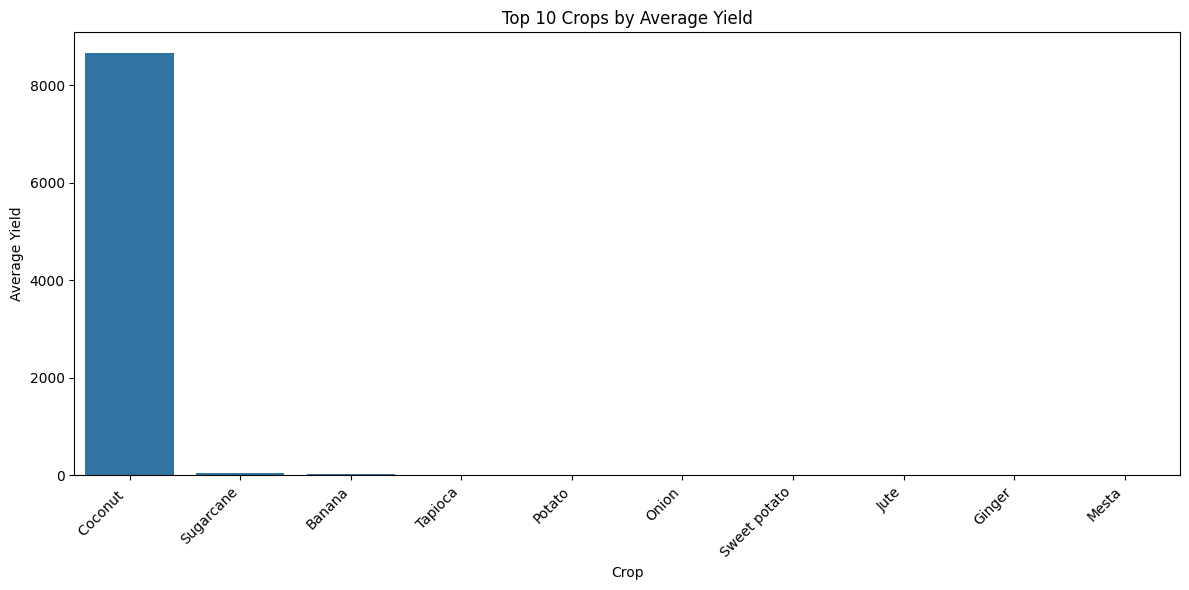

In [34]:
# Create a plot showing average yield by crop
plt.figure(figsize=(12, 6))
avg_yield = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_yield.index, y=avg_yield.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Crops by Average Yield')
plt.ylabel('Average Yield')
plt.tight_layout()
plt.show()

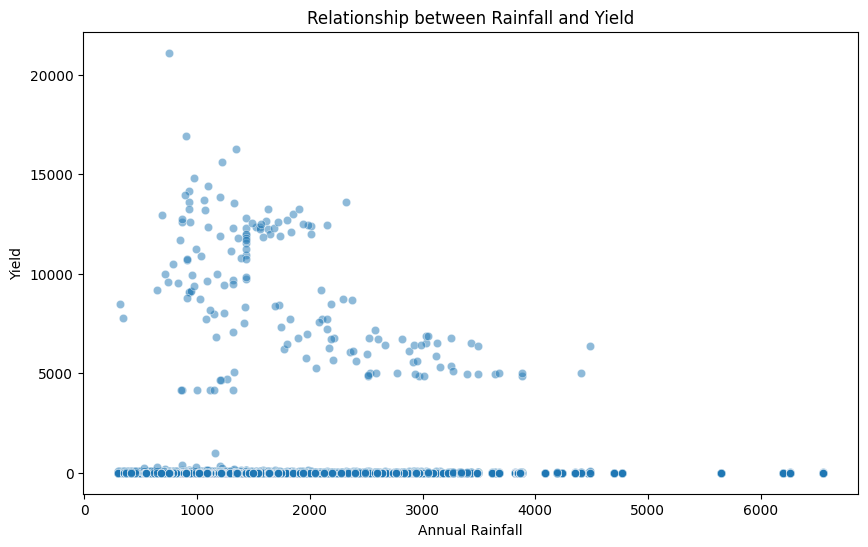

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual_Rainfall', y='Yield', alpha=0.5)
plt.title('Relationship between Rainfall and Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.show()